## Use this to compare test images with their predicted labels

In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image

In [12]:
# File read
main_path = r"C:\Users\judd_gallares\W207\group_project"
train_path = os.path.join(main_path,r"train_scene_classification")

# test images
test_img_path = os.path.join(main_path,"test_images")                      # get image file path
df_test_labels = pd.read_csv(main_path+r"\predicted_test_labels_cnn2d.csv")  # read test image labels csv

# training images
train_img_path = os.path.join(train_path,"train")
df_train_labels = pd.read_csv(train_path+r"\train.csv")

# train only images
train_img_only = os.path.join(main_path,"train_only")

# Assign names to label_ids: 0 - 5
# The labels have been rearranged from their order in kaggle to how they correspond to images in train.csv 
label_name = ['buildings','forests','glacier','mountains','sea','street']

test_img_count = len(os.listdir(test_img_path))
test_lbl_count = len(df_test_labels)
train_img_count = len(os.listdir(train_img_path))
train_lbl_count = len(df_train_labels)
train_img_only_count = len(os.listdir(train_img_only))

print("test_img_count: ",test_img_count)
print("test_lbl_count: ",test_lbl_count)
print("train_img_count: ",train_img_count)
print("train_lbl_count: ",train_lbl_count)
print("train_lbl_only: ",train_img_only_count)


test_img_count:  7288
test_lbl_count:  7288
train_img_count:  24335
train_lbl_count:  17034
train_lbl_only:  17034


### Vary STARTING_TEST_IMAGE_ID_NO below to go through other samples

In [13]:
STARTING_TEST_IMAGE_ID_NO = 0 # must be between 0 to 7288 -  NO_OF_SAMPLED_IMAGES (r*8)

r = 5 # no. of image grid rows

def plot_sample_images(img,label):
    """Accepts lists of images and labels 
       then plots them in grid format"""
    
    c = 8 # no. of image grid columns (fixed)
    
    fig, ax = plt.subplots(r, c, figsize=(18*r,9*c))    
    #fig.set_size_inches(18, 9)
    
    for i in range(r):
        for j in range(c):
            k = j + (c * i)
                
            ax[i, j].imshow(img[k])
            ax[i, j].axis('off')
            ax[i, j].set_title(label[k], fontsize=15*r)
        
    plt.show()

def display_sample_images(n_rows=8,data=1,path=test_img_path):
    img_list = []
    lbl_list = []
    
    for i in range(STARTING_TEST_IMAGE_ID_NO, STARTING_TEST_IMAGE_ID_NO+(r*8)):
        if data == 1:
            lbl = df_test_labels.iat[i,0]
            name = r"test_"+str(i)+".jpg"
        elif data== 2:
            lbl = label_name[df_train_labels.label.iloc[i]]
            name = df_train_labels.image_name.iloc[i]
            
        lbl_list.append(lbl)
        img = load_img(os.path.join(path, name))
        img_list.append(img)

    plot_sample_images(img_list,lbl_list)

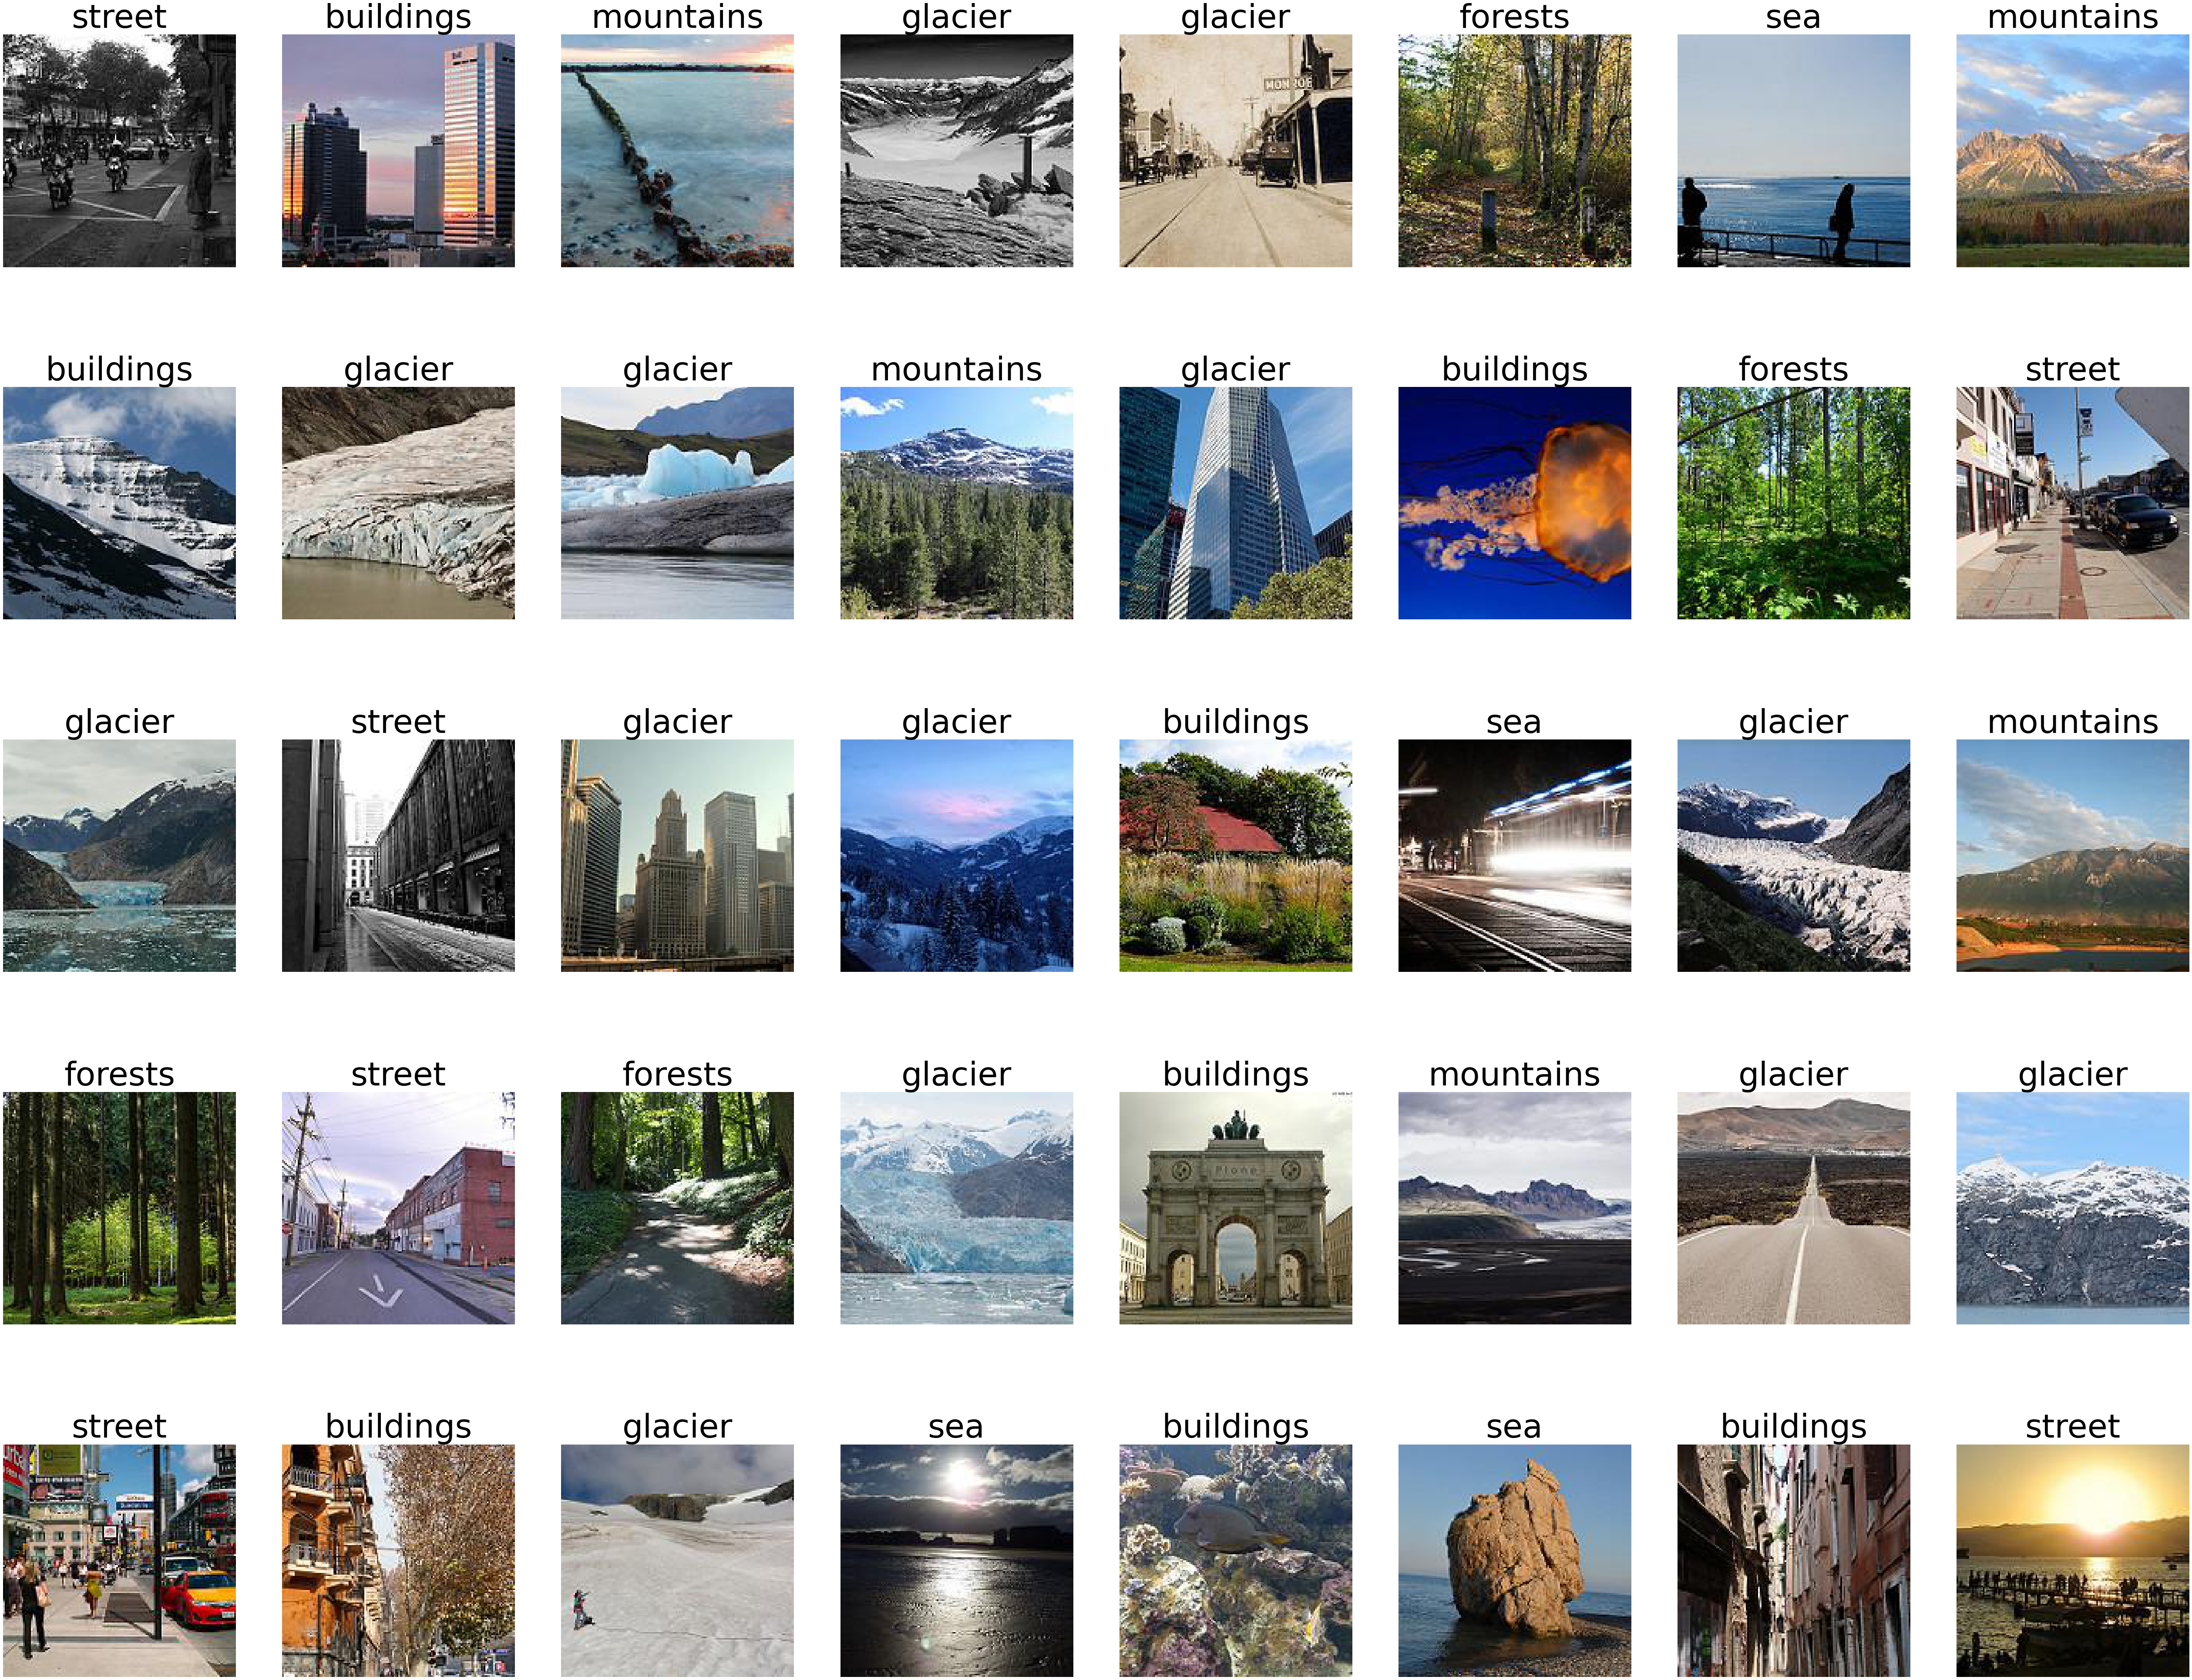

In [14]:
display_sample_images()

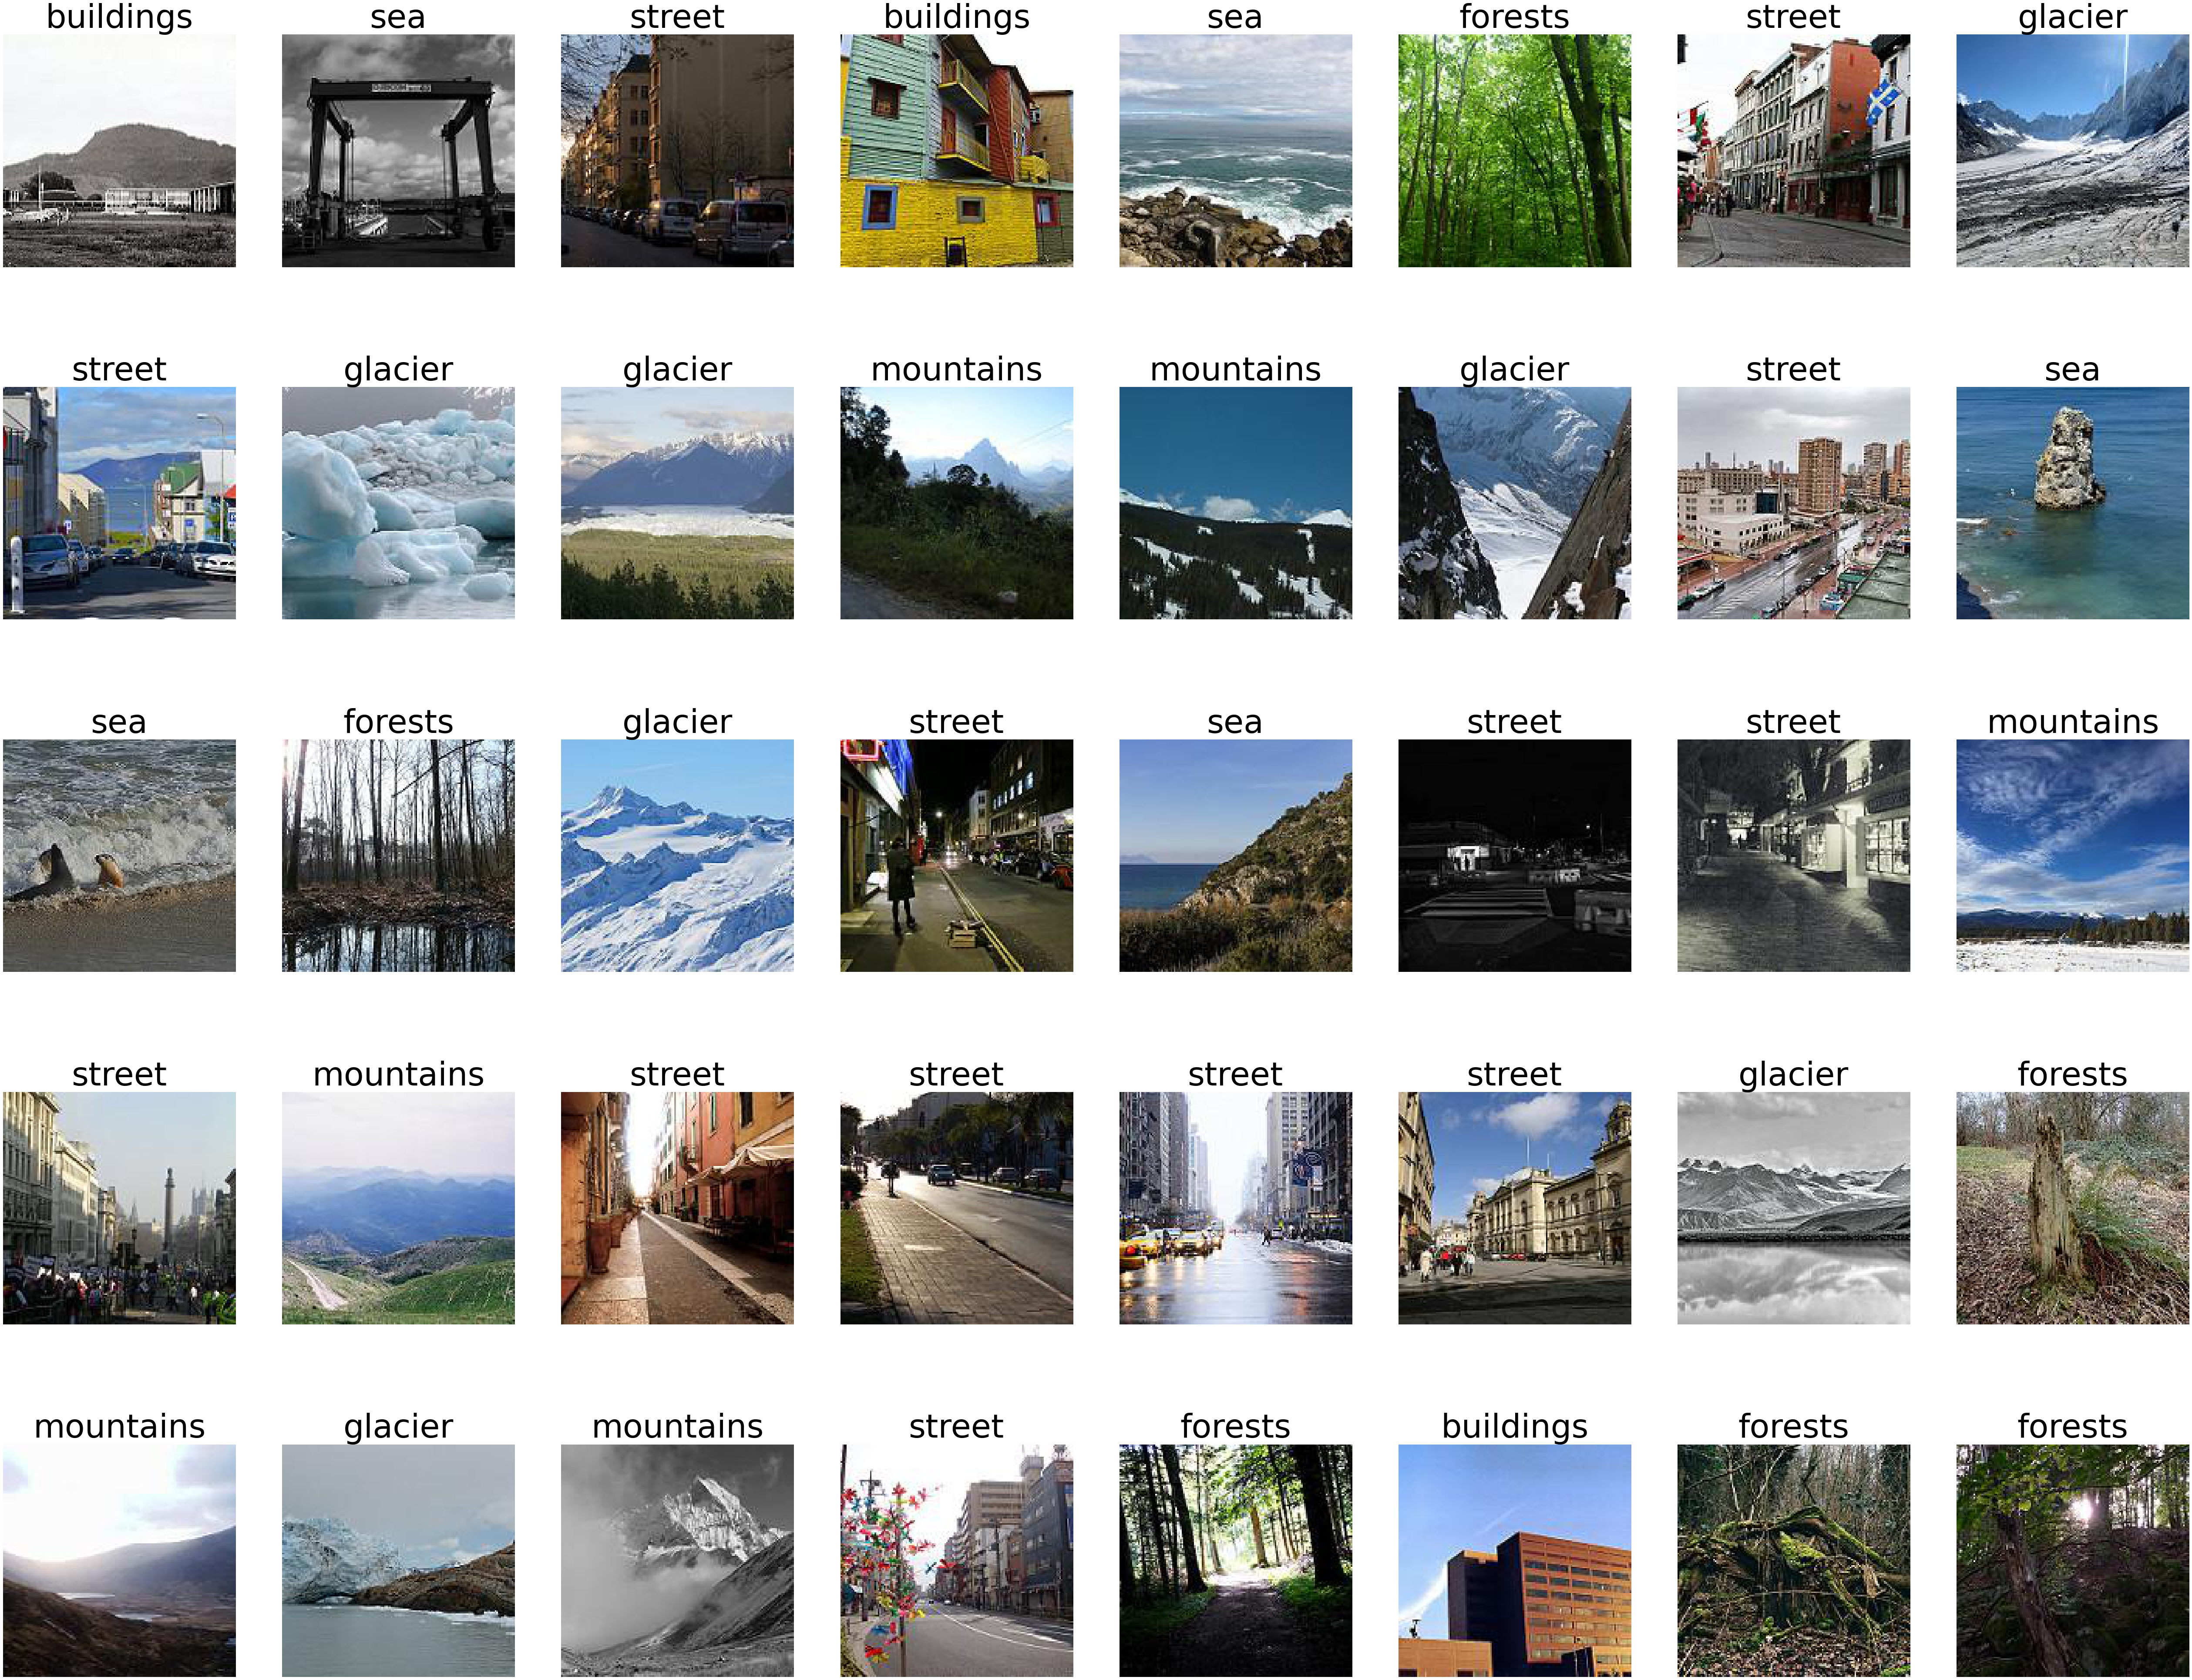

In [15]:
# train only images vs. their labels
display_sample_images(n_rows=8,data=2,path=train_img_only)


In [ ]:
# create a train only image folder

# for img_name in df_train_labels.image_name:
#     f = os.path.join(train_img_path, img_name)

#     m = Image.open(f)
#     m.save(os.path.join(train_img_only,img_name))
